In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv(r'C:\Users\Nandha\Downloads\kaggle Project- Water Quality Prediction using Machine Learning data set\water_potability.csv')

# this below command will give you the data head values only instead of giving you the total values

In [15]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# DATA CLEANING

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# to check the null values use this below command

In [17]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# to fill the null values with average values use this (fillna())command, by using inplace = True command it will remove the null values permanently

In [18]:
data.fillna(data.mean(),inplace=True)

In [19]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [20]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [21]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690300,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833605,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762125,8.114887,350.385756,481.792305,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### checking if we need to do dimensionality reduction 

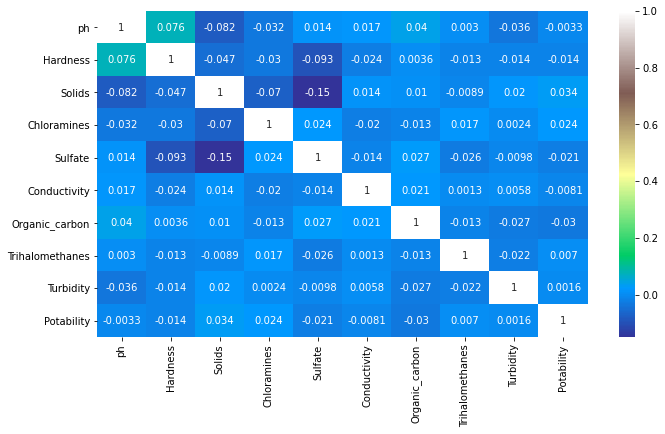

In [22]:
sns.heatmap(data.corr(),annot= True, cmap='terrain')
fig= plt.gcf()
fig.set_size_inches(11,6)
plt.show()

# Lets check the outlier using Box Plot

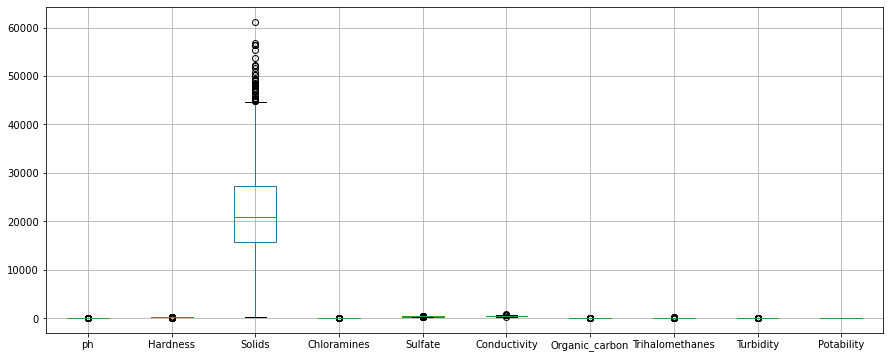

In [23]:
data.boxplot(figsize=(15,6))
plt.show()

In [24]:
data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690300
50%      20927.833605
75%      27332.762125
max      61227.196010
Name: Solids, dtype: float64

In [25]:
data['Solids']

0       20791.31898
1       18630.05786
2       19909.54173
3       22018.41744
4       17978.98634
           ...     
3271    47580.99160
3272    17329.80216
3273    33155.57822
3274    11983.86938
3275    17404.17706
Name: Solids, Length: 3276, dtype: float64

#### not removing the outliers because they may be important to decide the quality of the water 

### MORE EDA

In [26]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [27]:
data.shape

(3276, 10)

In [28]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


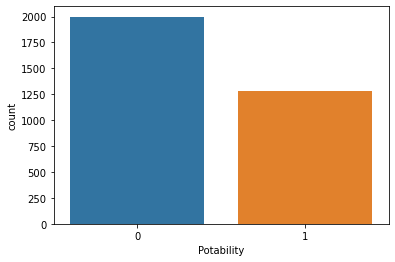

In [29]:
sns.countplot(data['Potability'])
plt.show()

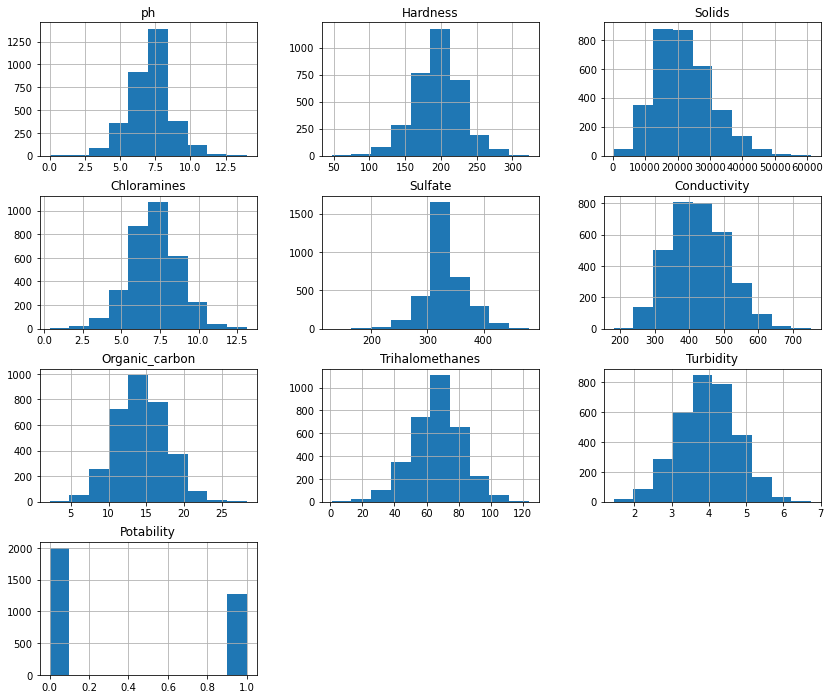

In [30]:
data.hist(figsize=(14,12))
plt.show()

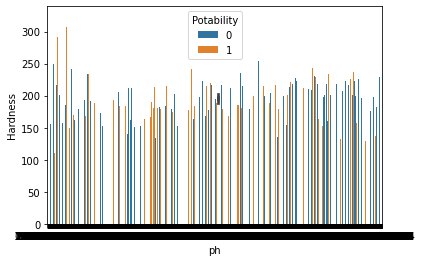

In [31]:
sns.barplot(x=data['ph'],y=data['Hardness'],hue=data['Potability'])
plt.show()

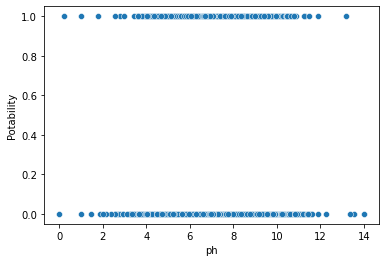

In [32]:
sns.scatterplot(x=data['ph'],y=data['Potability'])
plt.show()

# Partitioning

In [33]:
X = data.drop('Potability', axis=1) # Input data

In [34]:
Y = data['Potability'] # Target Variable

In [35]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, shuffle =True, random_state = 101)

# random_state number is nothing but seed value, in this process of partitioning we are partitioning input variables from target variables

# if we give None keyword to random_state it the value will differ everytime you run them

In [55]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
748,6.750761,207.254505,23642.992600,7.691012,293.783040,446.696939,6.000391,30.900815,2.777726
2279,7.539742,201.959317,26716.359710,5.637350,333.775777,516.354560,14.985649,83.536821,4.210678
1960,8.128270,231.167538,19954.575550,5.138838,349.067363,386.071149,15.018085,63.340968,4.678742
1491,7.368166,204.041451,8524.874646,9.469763,429.814322,328.565288,11.173155,88.888819,3.684263
2991,6.628256,198.865743,15911.357510,7.517906,342.015924,437.918625,15.005742,38.845958,4.464457
...,...,...,...,...,...,...,...,...,...
599,7.080795,205.638790,39742.970330,4.660528,323.956492,509.546419,11.674850,55.042679,3.916746
1599,8.227083,274.351887,40546.956330,7.130161,241.446917,417.673702,9.809669,79.397105,3.619182
1361,4.906492,173.779159,14786.138900,5.843757,267.561144,620.346840,7.775896,38.794307,3.152345
1547,6.217585,203.707222,15597.640880,7.751461,361.247810,452.922025,14.597145,70.850977,4.150167


In [56]:
Y_train

748     1
2279    0
1960    1
1491    1
2991    0
       ..
599     0
1599    1
1361    0
1547    1
863     0
Name: Potability, Length: 2620, dtype: int64

# Normalization

# for this project we don't have to do normalization process because the data has been equally distributed 

### MODEL TRAINING

# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [41]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [42]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2541,5.735724,158.318741,25363.016590,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954
2605,8.445219,228.522860,28966.569330,6.179855,333.775777,361.705354,14.554220,60.612230,4.400706
330,6.737004,220.100102,24694.744210,8.373660,333.775777,384.308673,6.748092,8.175876,4.063170
515,5.701155,233.515042,41411.601710,5.895464,310.160545,509.767888,22.686837,73.751883,3.403136
400,6.259652,208.379430,37356.746400,8.565487,256.473839,380.240193,5.567693,68.441865,4.213405
...,...,...,...,...,...,...,...,...,...
482,7.705711,178.922858,18476.619170,8.226228,334.889911,518.043369,10.638798,63.157489,3.861956
2970,10.933111,162.424918,18846.634910,7.085261,333.775777,593.725764,14.977233,60.690580,3.894989
50,7.080795,168.388431,27492.307310,7.046225,299.820478,383.795020,16.182066,75.729434,3.048057
839,7.611610,222.252270,25063.683010,8.561124,287.948123,505.265483,18.273757,68.395413,2.873261


In [43]:
Y_test

2541    0
2605    0
330     1
515     0
400     1
       ..
482     0
2970    0
50      0
839     0
374     1
Name: Potability, Length: 656, dtype: int64

In [44]:
Y_prediction = dt.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [52]:
accuracy_score(Y_prediction, Y_test)

0.573170731707317

### the accuracy percentage depends on the domain  itself, for example in automobile industry the accuracy should be 100% because it is very important. But with the Psychology domain 50% accuracy is good

In [53]:
confusion_matrix(Y_prediction, Y_test)

array([[262, 140],
       [140, 114]], dtype=int64)

In [54]:
Y_test.shape

(656,)

### TRY MORE ML MODELS

## MODEL OPTIMIZATION (OR) HYPER PARAMETER TUNING

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

dt = DecisionTreeClassifier()
criterion = ['gini',"entropy"]
splitter = ['best','random']
min_samples_split = range(1,10)

parameters = dict(criterion=criterion, splitter=splitter, min_samples_split= min_samples_split)
cv = RepeatedStratifiedKFold(n_splits =5, random_state = 101)

grid_search_cv_dt = GridSearchCV(estimator = dt, param_grid = parameters, scoring = 'accuracy', cv=cv)

In [66]:
grid_search_cv_dt.fit(X_train, Y_train)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will 

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [67]:
print(grid_search_cv_dt.best_params_)

{'criterion': 'entropy', 'min_samples_split': 9, 'splitter': 'random'}


In [68]:
prediction_grid=grid_search_cv_dt.predict(X_test)

In [69]:
accuracy_score(Y_test, prediction_grid)

0.6021341463414634

In [70]:
confusion_matrix(Y_test, prediction_grid)

array([[286, 116],
       [145, 109]], dtype=int64)

### how to check only one set of data ? follow the below command, it has some errors i am looking into it

In [73]:
dt.predict([[5.735724,158.318741,25363.016590,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954]])

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [71]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2541,5.735724,158.318741,25363.016590,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954
2605,8.445219,228.522860,28966.569330,6.179855,333.775777,361.705354,14.554220,60.612230,4.400706
330,6.737004,220.100102,24694.744210,8.373660,333.775777,384.308673,6.748092,8.175876,4.063170
515,5.701155,233.515042,41411.601710,5.895464,310.160545,509.767888,22.686837,73.751883,3.403136
400,6.259652,208.379430,37356.746400,8.565487,256.473839,380.240193,5.567693,68.441865,4.213405
...,...,...,...,...,...,...,...,...,...
482,7.705711,178.922858,18476.619170,8.226228,334.889911,518.043369,10.638798,63.157489,3.861956
2970,10.933111,162.424918,18846.634910,7.085261,333.775777,593.725764,14.977233,60.690580,3.894989
50,7.080795,168.388431,27492.307310,7.046225,299.820478,383.795020,16.182066,75.729434,3.048057
839,7.611610,222.252270,25063.683010,8.561124,287.948123,505.265483,18.273757,68.395413,2.873261


In [74]:
Y_test

2541    0
2605    0
330     1
515     0
400     1
       ..
482     0
2970    0
50      0
839     0
374     1
Name: Potability, Length: 656, dtype: int64

## try more ml models